In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000115.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

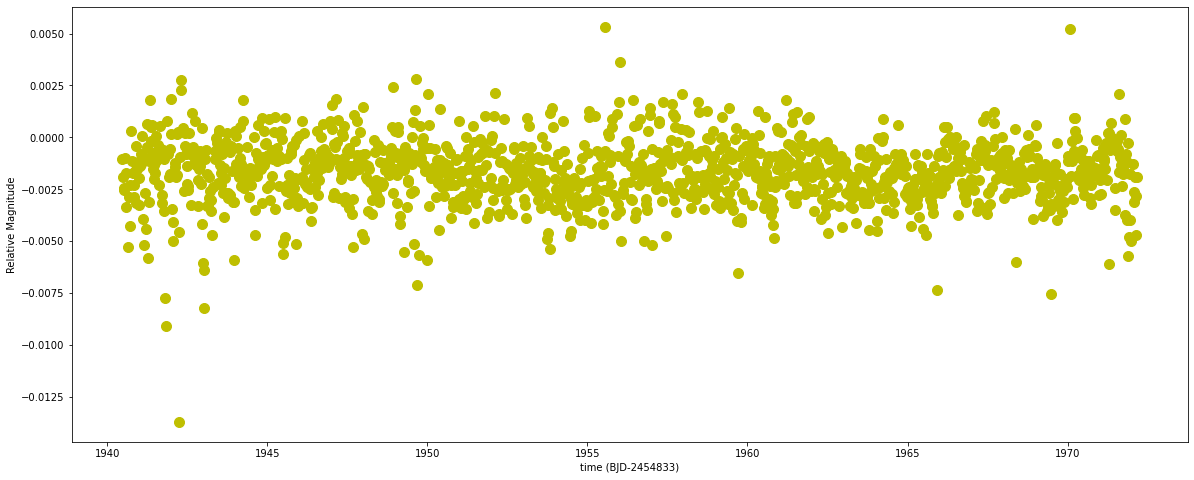

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000115')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200811 15:41:37 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200811 15:41:37 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200811 15:42:03 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 15:42:03 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200811 15:42:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 12706286.60368, reduced chisq = 9356.61753
[I 200811 15:42:18 png:696] plotting phased LC with period 0.137303, epoch 1940.47761
[I 200811 15:42:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 13031649.17030, reduced chisq = 9596.20705
[I 200811 15:42:18 png:696] plotting phased LC with period 0.068652, epoch 1940.47761
[I 200811 15:42:19 nonphysical:216] spline fit done. nknots = 13,  chisq = 12893887.46994, reduced chisq = 9494.76250
[I 200811 15:42:19 png:696] plotting phased LC with period 0.274606, epoch 1940.47761
[I 200811 15:42:19 nonphysical:216] spline fit done. nknots = 13,  chisq = 12736260.88569, reduced chisq = 9378.68990
[I 200811 15:42:19 png:696] plotting phased LC with period 0.113909, epoch 1962.46206
[I 200811 15:42:19 nonphysical:216] spline fit done. nknots = 13,  chisq = 12833687.49676, reduced chisq = 9450.43262
[I 200811 15:42:19 png:696] plotting phased LC with period 0.15368

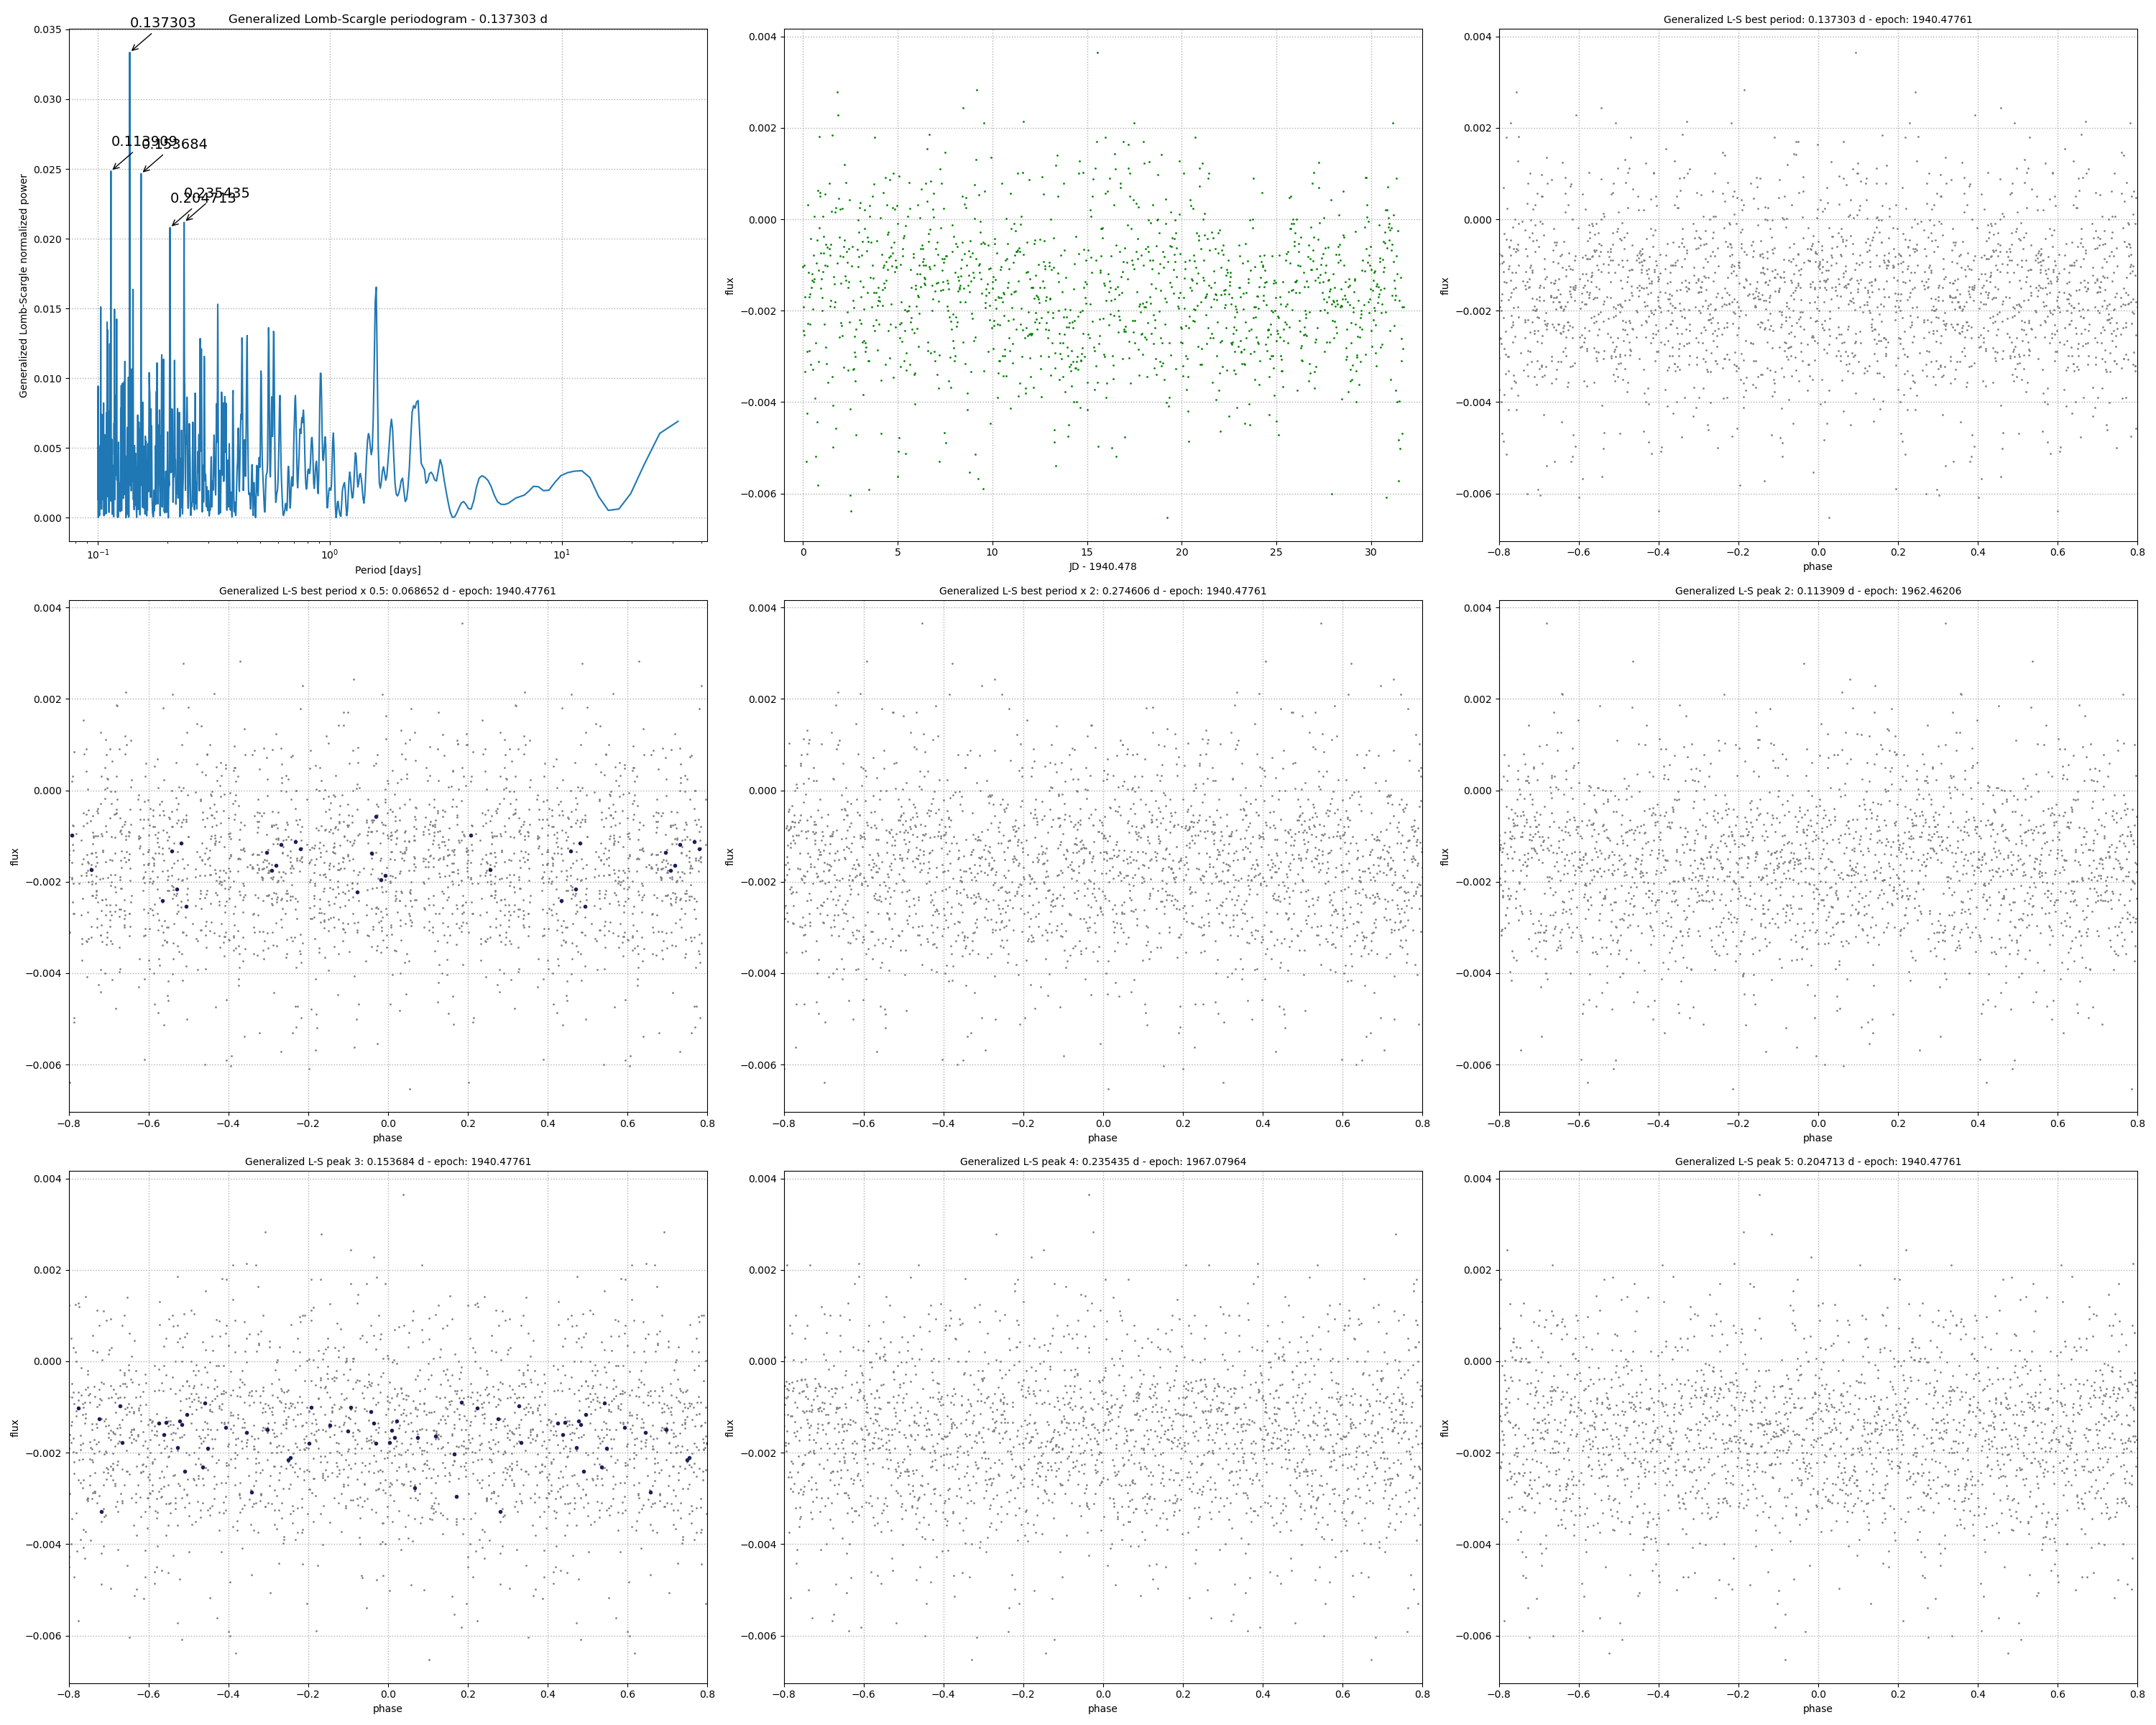

In [8]:
from IPython.display import Image
Image('0000115-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.13730311087521724,
 'bestlspval': 0.033352863052282015,
 'nbestpeaks': 5,
 'nbestlspvals': [0.033352863052282015,
  0.024841867996837835,
  0.02466055328354893,
  0.02117145568139028,
  0.02079534023270825],
 'nbestperiods': [0.13730311087521724,
  0.11390926667864895,
  0.1536835983996127,
  0.23543505193165035,
  0.2047129069121456],
 'lspvals': array([0.00691683, 0.00604822, 0.00382057, ..., 0.0066118 , 0.00374158,
        0.00131629]),
 'omegas': array([ 0.19827305,  0.23792766,  0.27758227, ..., 62.73359293,
        62.77324754, 62.81290215]),
 'periods': array([31.68955799, 26.40796499, 22.63539856, ...,  0.10015663,
         0.10009336,  0.10003017]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.13730311087521724, 0.11390926667864895, 0.1536835983996127, 0.23543505193165035, 0.2047129069121456] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,magsarefluxes=True)

[I 200811 15:45:04 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200811 15:45:04 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889033986491362e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200811 15:45:04 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200811 15:45:04 abls:969] new minfreq: 0.0631122718919309, maxfreq: 10.0
[I 200811 15:45:04 abls:980] using 6 workers...
[I 200811 15:45:04 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200811 15:45:04 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200811 15:45:04 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200811 15:45:04 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200811 15:45:04 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200811 15:45:04 abls:1090] worker 6: minfreq = 8.388015, nfreqs

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs, magsarefluxes=True)

[W 200811 15:45:18 png:1142] no best period found for this object, skipping...


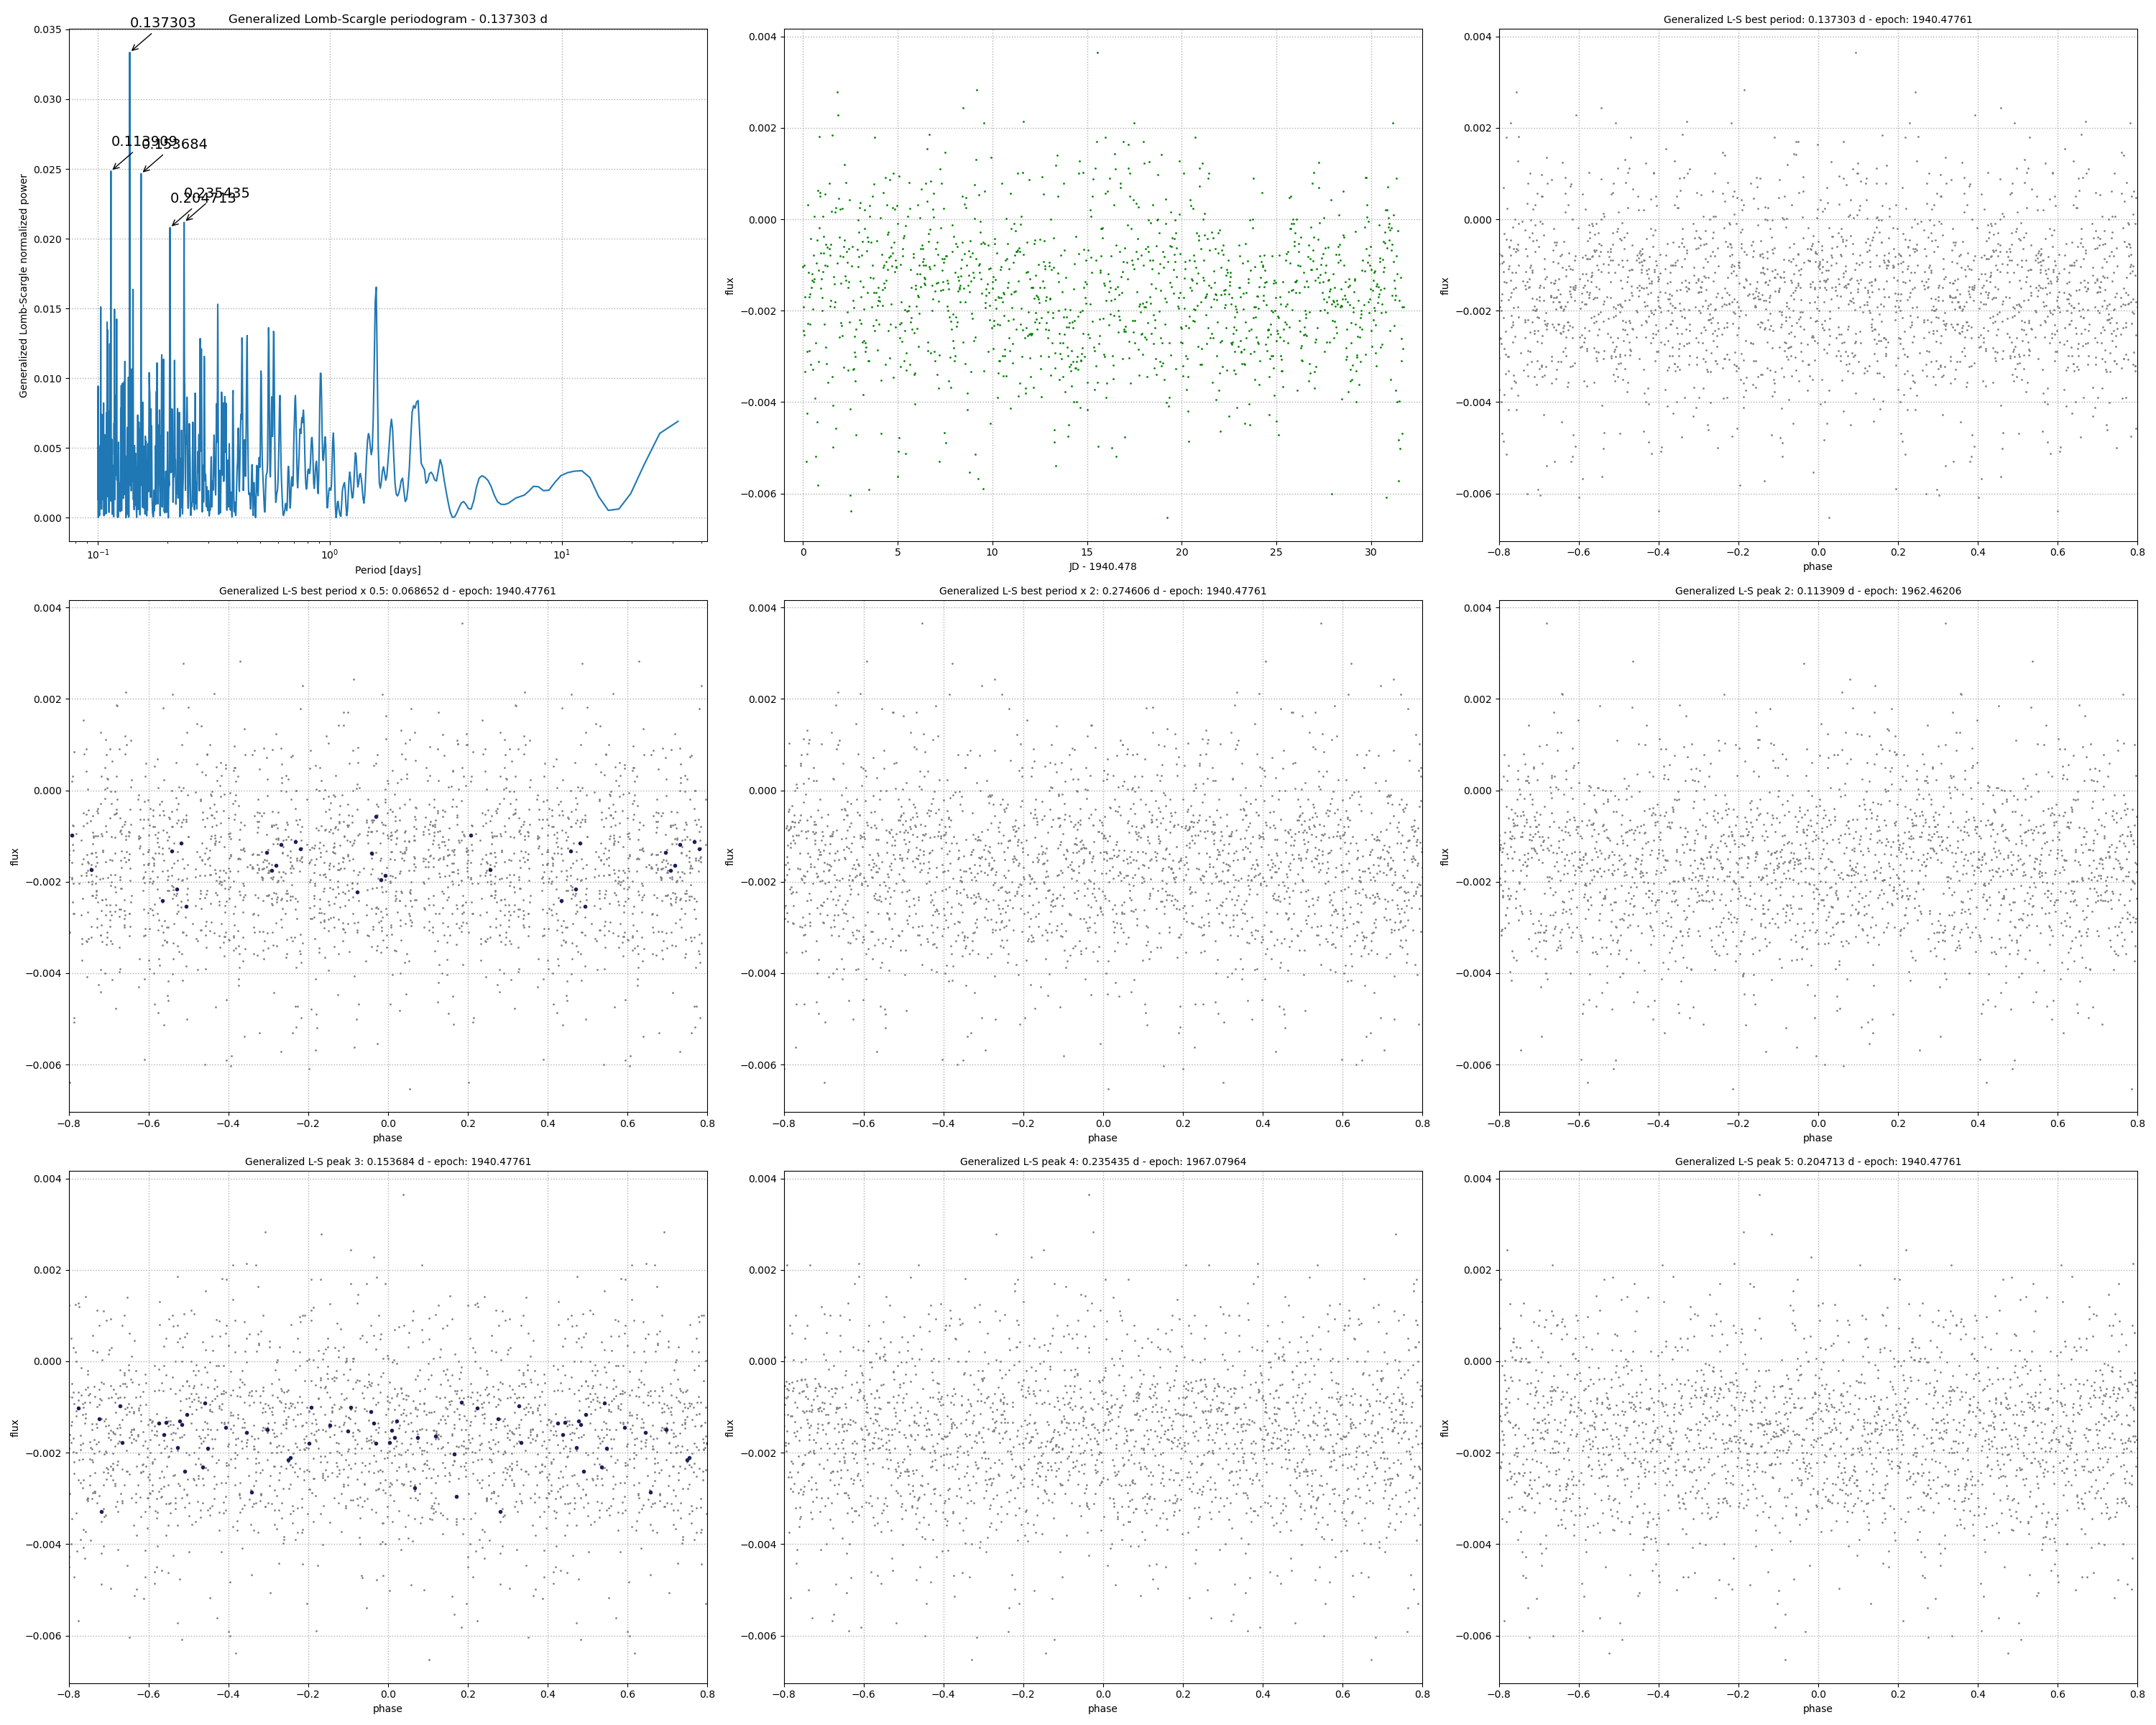

In [14]:
Image('0000115-checkplot-glsp.png')
# This is the same checkplot from before because no best period was found to create a new checkplot. 

In [15]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs,magsarefluxes=True)

[I 200811 15:46:11 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 15:46:11 spdm:349] using 6 workers...


[I 200811 15:46:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13131363.48963, reduced chisq = 9669.63438
[I 200811 15:46:47 png:696] plotting phased LC with period 8.802655, epoch 1958.06925
[I 200811 15:46:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13243224.67990, reduced chisq = 9752.00639
[I 200811 15:46:47 png:696] plotting phased LC with period 4.401327, epoch 1962.46206
[I 200811 15:46:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13413623.81877, reduced chisq = 9877.48440
[I 200811 15:46:47 png:696] plotting phased LC with period 17.605310, epoch 1958.06925
[I 200811 15:46:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13150656.49968, reduced chisq = 9683.84131
[I 200811 15:46:47 png:696] plotting phased LC with period 11.317699, epoch 1963.09545
[I 200811 15:46:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13299603.95462, reduced chisq = 9793.52279
[I 200811 15:46:47 png:696] plotting phased LC with period 0.215

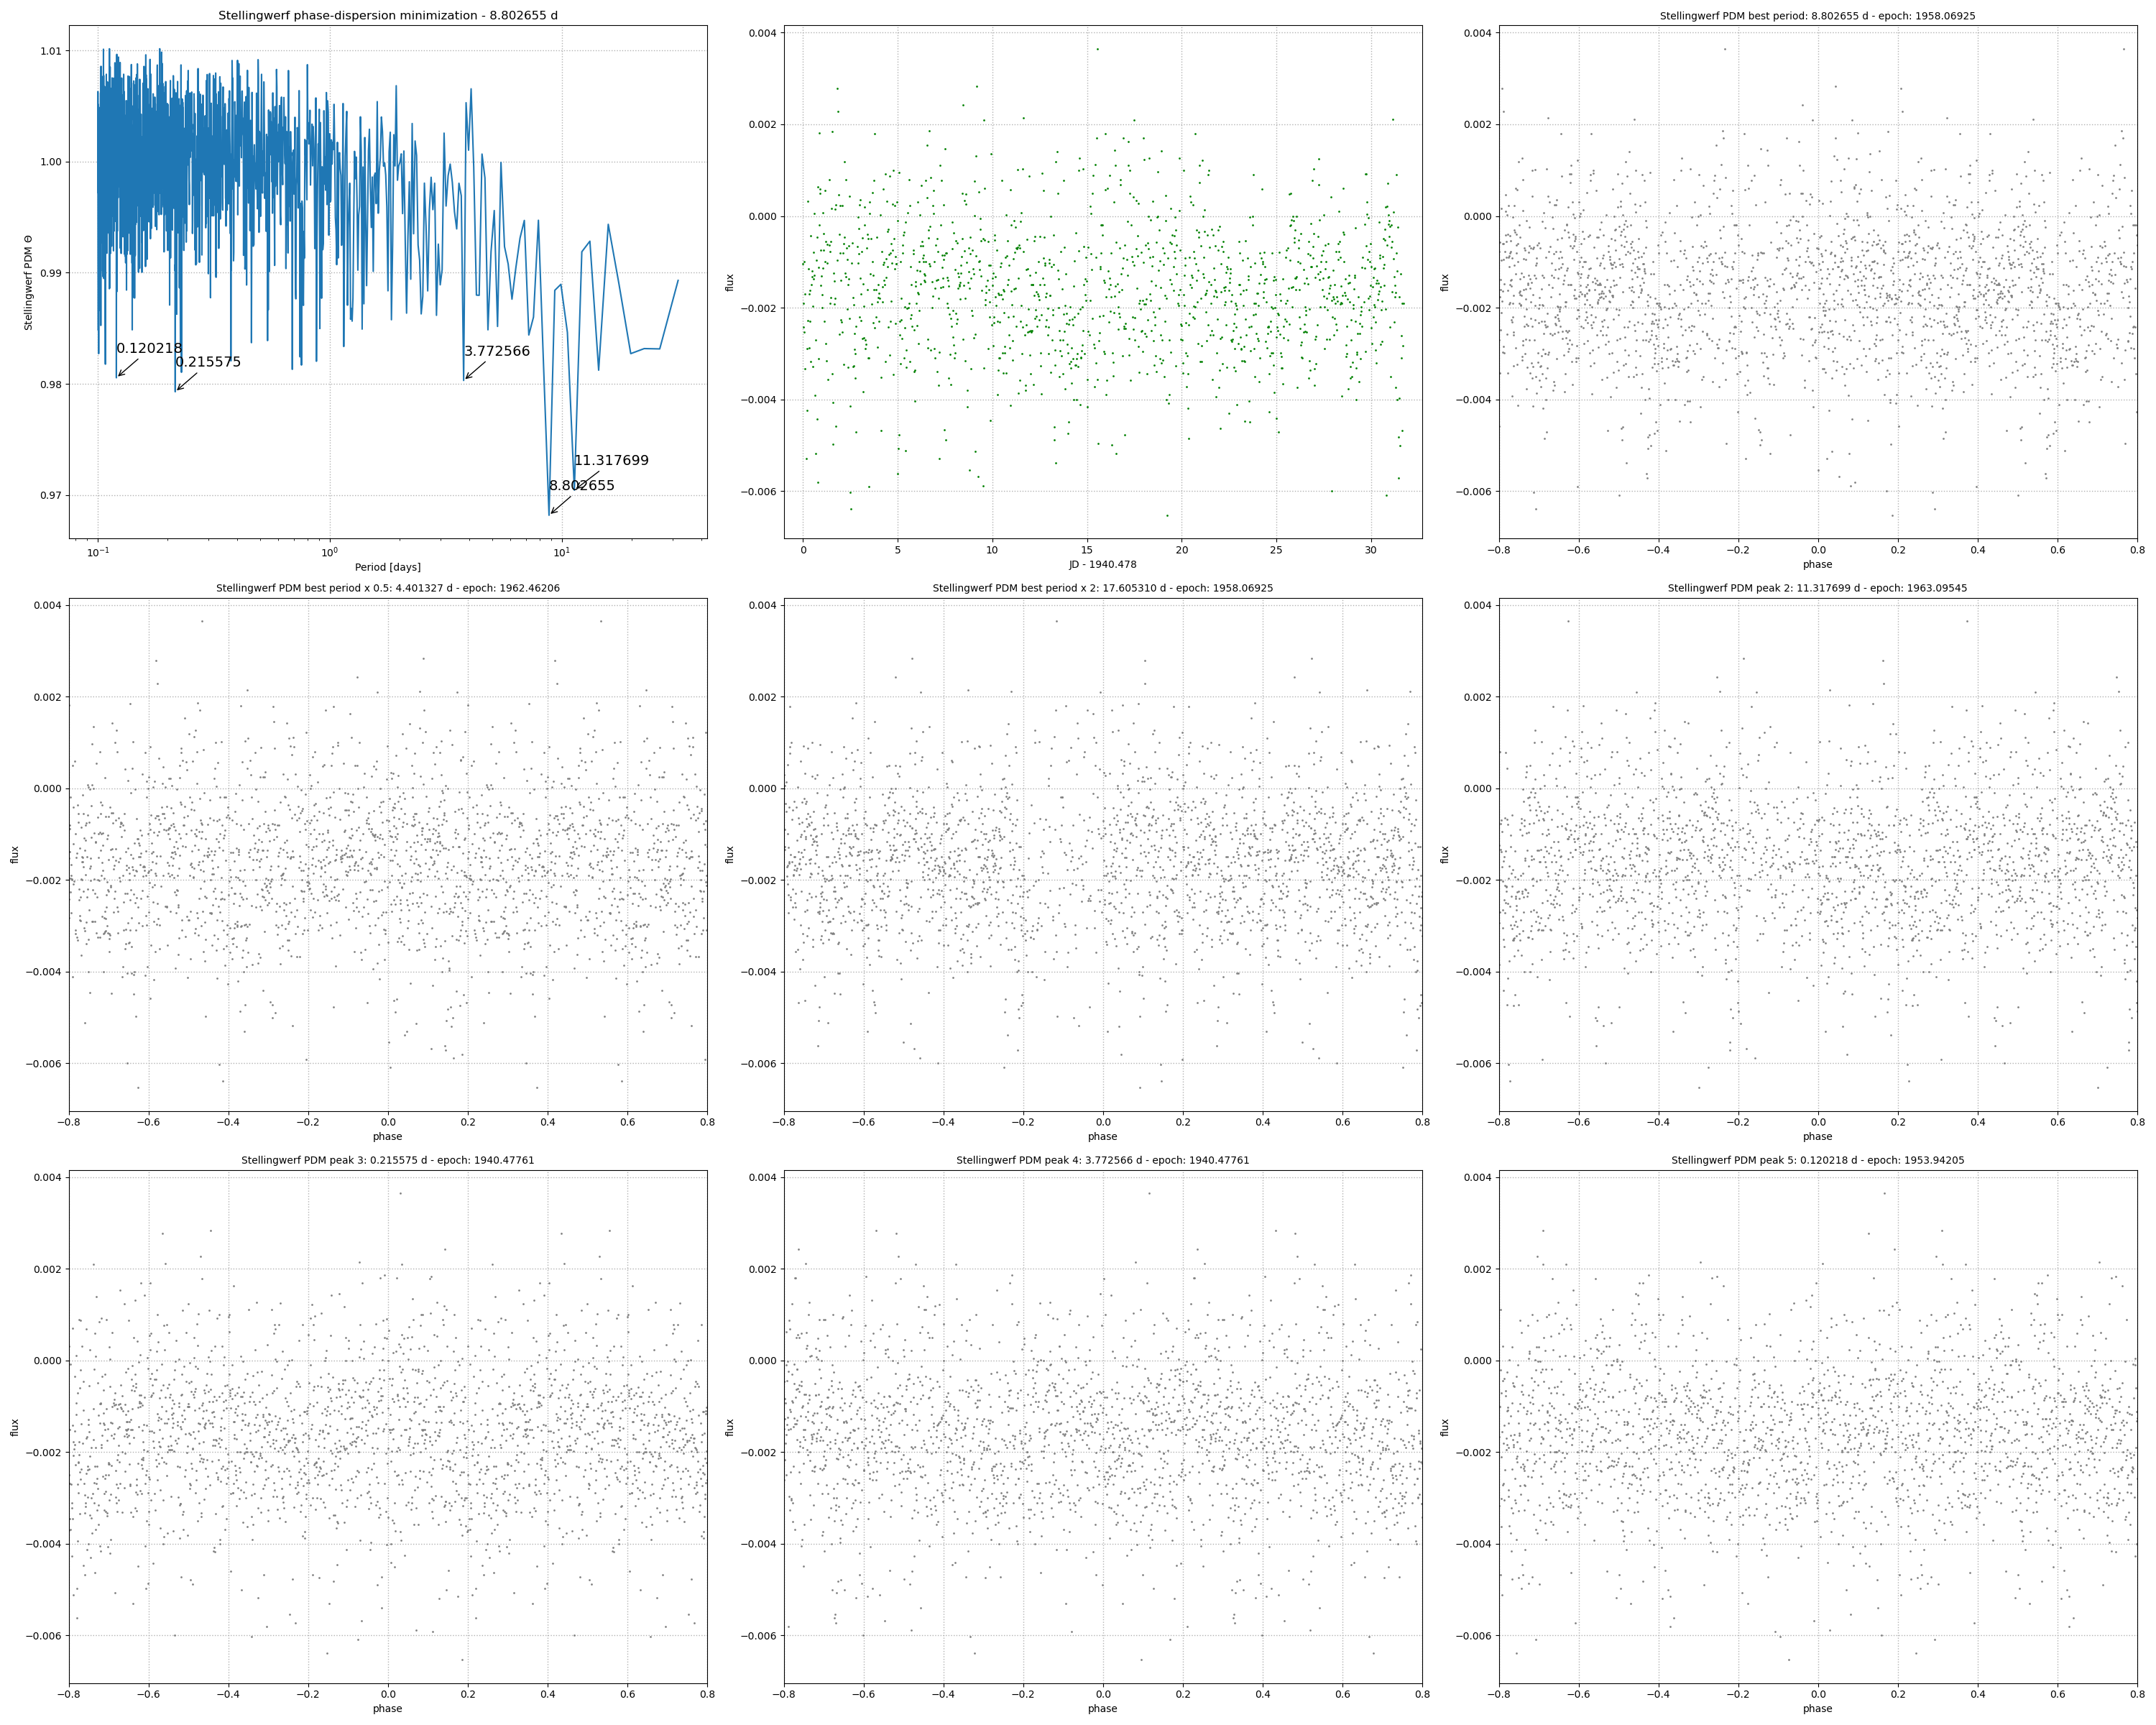

In [16]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs, magsarefluxes=True)
Image('0000115-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [8.80265499722226, 11.317699282142906, 0.21557522442176963, 3.772566427380969, 0.12021835352807335] (days)
